In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import random
from sklearn.feature_extraction import text
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.preprocessing import scale


In [0]:
#Setting random seed
np.random.seed(42)
random.seed(42)

# Loading all 20 categories dataet
news_dataset = fetch_20newsgroups(subset='all')
                        
print(type(news_dataset))
print(news_dataset.keys())


<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [0]:
print(len(news_dataset.filenames))
print(len(news_dataset.data))

18846
18846


In [0]:
# Loads data from news group
# based on categories as parameter
def load_data(categories):
    dataset = fetch_20newsgroups(subset = 'all', categories = categories,shuffle = True, random_state = None)
    return dataset

In [0]:
def create_stopwords():
    combined_stopwords=set(punctuation)
    return combined_stopwords

In [0]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
combined_stopwords = create_stopwords()
analyzer = CountVectorizer().build_analyzer()
wnl = nltk.wordnet.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
categories = ['comp.sys.ibm.pc.hardware', 'comp.graphics','comp.sys.mac.hardware', 'comp.os.ms-windows.misc','rec.autos', 'rec.motorcycles',
              'rec.sport.baseball', 'rec.sport.hockey']
dataset = load_data(categories)

In [0]:
#Q1 Report the dimensions of the TF-IDF matrix you get.

count_vect = CountVectorizer(min_df=3,analyzer='word', stop_words= 'english')
X_counts = count_vect.fit_transform(dataset.data)
print(X_counts.shape)
# print(count_vect.get_feature_names())


# Calculating the TF-IDF matrix for train and test data
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
print(X_tfidf.shape)


(7882, 27768)
(7882, 27768)


In [0]:
#Combining Data into Two categories
from copy import deepcopy
y= dataset.target

labels = deepcopy(y)
labels[y<=3] = 0
labels[y>=4] = 1

print(np.unique(labels))
print(labels.shape)


[0 1]
(7882,)


In [0]:
#perform Kmeans clustering
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init =30)
kmeans.fit(X_tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [0]:
kmeans_labels=kmeans.labels_

In [0]:
kmeans.cluster_centers_


array([[2.96685975e-03, 2.10066739e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.74905745e-04, 3.53538326e-04],
       [2.46412091e-03, 2.02761737e-03, 6.74631194e-05, ...,
        2.15677061e-04, 1.26664353e-04, 3.29838191e-05]])

In [0]:
#Q2 Contingency table
from sklearn.metrics.cluster import contingency_matrix

In [0]:

contingency_matrix_= contingency_matrix(labels,kmeans_labels)
print(contingency_matrix_)


[[   4 3899]
 [1718 2261]]


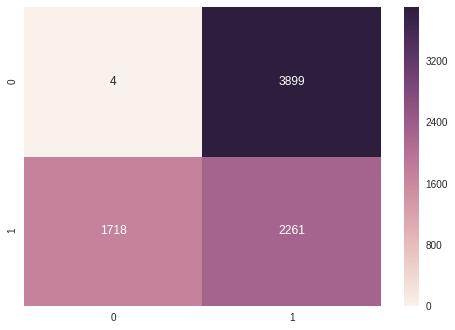

In [0]:
import seaborn as sns
ax=sns.heatmap(contingency_matrix_, annot=True, fmt="d")

In [0]:
#Q3 Kmeans metrics for evaluation

def evaluate(labels, kmeans_labels):
    print("homogeneity:  ",homogeneity_score(labels, kmeans_labels))
    print("completeness: ",completeness_score(labels, kmeans_labels))
    print("v_measure :", v_measure_score(labels, kmeans_labels))
    print("adjusted_rand_score: ",adjusted_rand_score(labels, kmeans_labels))
    print("adjusted_mutual_info_score: " ,adjusted_mutual_info_score(labels, kmeans_labels))
    return homogeneity_score(labels, kmeans_labels),completeness_score(labels, kmeans_labels),v_measure_score(labels, kmeans_labels),adjusted_rand_score(labels, kmeans_labels),adjusted_mutual_info_score(labels, kmeans_labels)


In [0]:
evaluate(labels, kmeans_labels)

homogeneity:   0.2535958928926043
completeness:  0.334815748824373
v_measure : 0.28860033608397917
adjusted_rand_score:  0.18076179588914554
adjusted_mutual_info_score:  0.25352755133060884


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [0]:
# Dimension reduction using truncatedSVD
def dimension_reduction_SVD(X_tfidf):
    svd = TruncatedSVD(n_components=1000)
    X_reduced = svd.fit_transform(X_tfidf)
    #print(svd.explained_variance_ratio_)
    variance_ratios=svd.explained_variance_ratio_
    print(variance_ratios)
    #print(X_reduced.shape)
    #print("LSI mean squared residual :", np.sum(np.array(X_train - X_train_reduced.dot(svd.components_))**2))
    return X_reduced, variance_ratios

In [0]:
X_reduced_svd, variance_ratios = dimension_reduction_SVD(X_tfidf)


[0.00119855 0.00516645 0.00364295 0.003559   0.00320919 0.00255188
 0.00249447 0.00241068 0.00231247 0.00218292 0.00215683 0.00209896
 0.00203723 0.00199506 0.00197322 0.00192575 0.00191031 0.00186392
 0.00184037 0.00180183 0.00177212 0.00171432 0.00168549 0.00166787
 0.00165617 0.00164475 0.00159955 0.00158992 0.0015745  0.00155278
 0.00153817 0.00151933 0.001502   0.00148175 0.00146811 0.00146077
 0.00145667 0.00144085 0.00142557 0.0013985  0.00139369 0.0013824
 0.00136638 0.00135514 0.00133396 0.00133234 0.00131945 0.00130535
 0.00130213 0.00129434 0.00128594 0.00128268 0.00126779 0.00124944
 0.00124207 0.00123807 0.00123119 0.00122581 0.0012214  0.00121293
 0.00120181 0.00119331 0.00118945 0.00117453 0.00117174 0.00115404
 0.00115361 0.00114778 0.00113939 0.0011336  0.00113009 0.00112352
 0.00111113 0.00110772 0.00110125 0.0010969  0.00108742 0.00108537
 0.00107808 0.00107533 0.0010714  0.00106348 0.00105566 0.00105404
 0.00105125 0.00104463 0.00104291 0.00104001 0.00103304 0.00103

In [0]:
#Q4 Report the plot of the percent of variance the top r principle components can retain v.s. r, for r = 1 to 1000.

variance_ratio_accumulator=[]
variance_ratio_sum=0.0
for i in range(1000):
    #print("ratio:",variance_ratios[i])
    variance_ratio_sum+=variance_ratios[i]*100
    #print("sum:" ,variance_ratio_sum)
    variance_ratio_accumulator.append(variance_ratio_sum)
print(variance_ratio_accumulator)

[0.11985548783477697, 0.6365003147825637, 1.0007957011823718, 1.3566958110918055, 1.677614433898282, 1.9328026337796373, 2.1822496697230473, 2.423317483749593, 2.654564785286237, 2.8728569634322576, 3.088539658984295, 3.298435842325771, 3.5021593236882613, 3.7016649604371774, 3.898986666128579, 4.091561640218141, 4.282592815204639, 4.468985285264533, 4.65302211464511, 4.833204664473443, 5.0104167837004, 5.18184862523275, 5.350397912662875, 5.517185170613912, 5.682802300861101, 5.847277729353525, 6.007232894920802, 6.166224426331466, 6.323674465017521, 6.478952933732053, 6.632769845450638, 6.7847027737299825, 6.934902572149402, 7.083077104627068, 7.22988847629744, 7.375965962079634, 7.521633151697274, 7.66571784005777, 7.808274744017448, 7.948125099563781, 8.087494203717473, 8.225733829535082, 8.362371582956147, 8.497885543199267, 8.631281756017318, 8.764515793021365, 8.896460796936994, 9.02699553670545, 9.157209030888483, 9.286643374792371, 9.415237108117164, 9.543505408029665, 9.67028

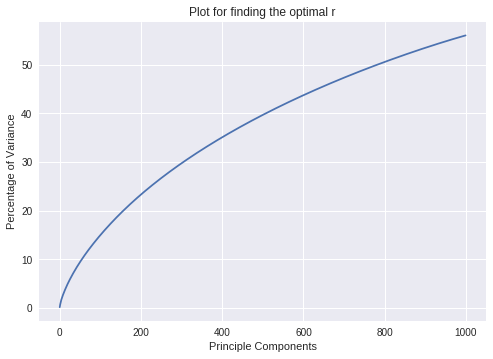

In [0]:
#Plotting

dim=range(1000)

plt.plot(dim, variance_ratio_accumulator)
plt.xlabel('Principle Components')
plt.ylabel('Percentage of Variance')
plt.title('Plot for finding the optimal r')
plt.show()

In [0]:
#Find the best R's for LSI
print(X_reduced_svd[:,0])
r = [1, 2, 3, 5, 10, 20, 50, 100, 300]
homogeneity_list = list()
completeness_list = list()
v_measure_list = list()
rand_index_list = list()
mutual_information_list = list()

for i in r:
    extract_num_comp_from_X = X_reduced_svd[:, 0:i]
    #print(extract_num_comp_from_X.shape)
    kmeans_2 = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init =30)
    kmeans_2.fit(extract_num_comp_from_X)
    kmeans_labels_2=kmeans_2.labels_
    homogeneity_list.append(homogeneity_score(labels, kmeans_labels_2))
    completeness_list.append(completeness_score(labels, kmeans_labels_2))
    v_measure_list.append(v_measure_score(labels, kmeans_labels_2))
    rand_index_list.append(adjusted_rand_score(labels, kmeans_labels_2))
    mutual_information_list.append(adjusted_mutual_info_score(labels, kmeans_labels_2))
print(homogeneity_list)
print(completeness_list)
print(v_measure_list)
print(rand_index_list)
print(mutual_information_list)

[0.12491455 0.11487509 0.14972207 ... 0.09497781 0.14869694 0.09084749]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='a

[0.0003003030178761853, 0.5960249753578137, 0.4164457136347125, 0.22169446004255983, 0.23391481037641562, 0.23533599817531964, 0.24036931129115102, 0.2459136851918752, 0.24794628349395062]
[0.0003047688479979988, 0.5971396831400697, 0.4506183461160515, 0.30996400619493775, 0.32068405497161595, 0.3217540167156483, 0.32481406685458625, 0.32972145379678475, 0.33054175148611625]
[0.0003025194525487269, 0.5965818085440118, 0.4328586258762355, 0.25850167861455114, 0.27051173233956144, 0.2718422540943059, 0.2762831907890341, 0.28171670663624065, 0.28334760224863614]
[0.00033904080274629444, 0.6972989204562027, 0.4199087300516852, 0.14515583921549685, 0.15699331100274733, 0.15860666758469216, 0.16534887546071145, 0.17075973241529788, 0.17413273860022838]
[0.00020877974994934834, 0.5959879913066645, 0.416392287513305, 0.2216231954089647, 0.23384466542555024, 0.23526598345354632, 0.24029975786004792, 0.2458446396949744, 0.24787742430862547]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [0]:
import matplotlib.pyplot as plt
def plot_graph_R_VS_Scores(r, score_list,name_of_score):
    plt.plot(r, score_list)
    plt.title('R VS ' + name_of_score)
    plt.xlabel('R')
    plt.ylabel(name_of_score)
    plt.figure()


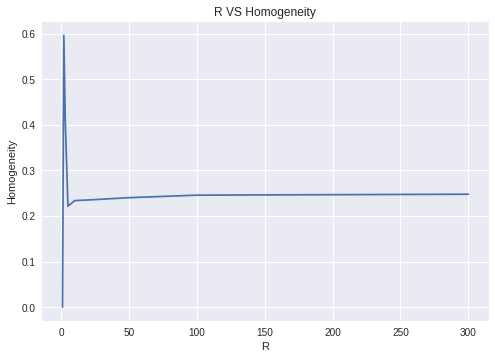

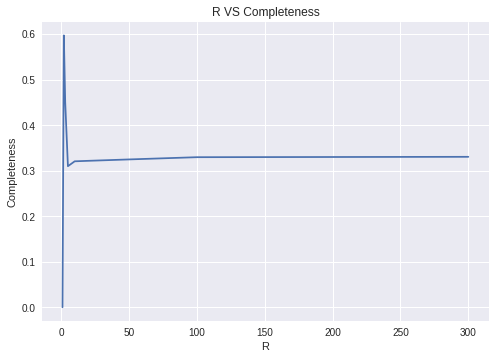

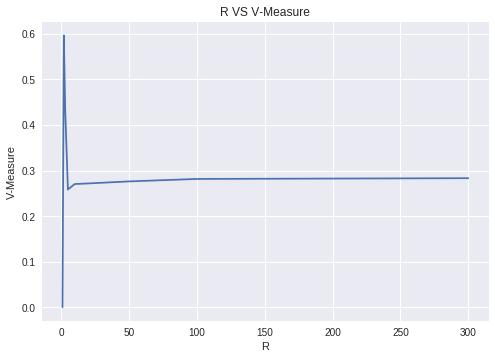

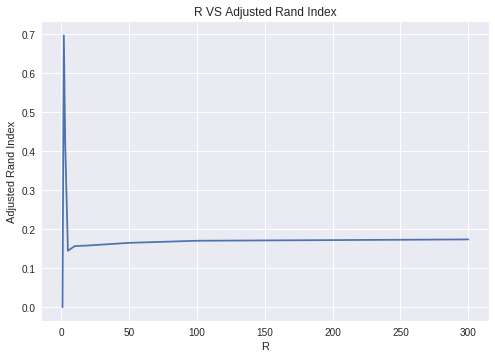

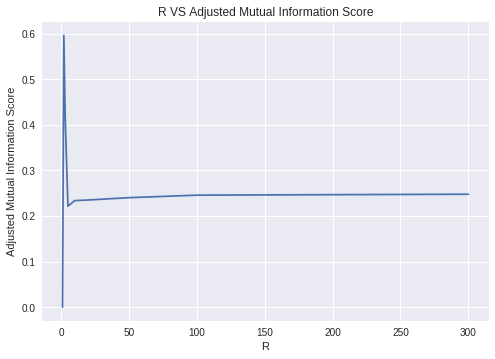

<Figure size 576x396 with 0 Axes>

In [0]:


# Plot all these values for LSI
plot_graph_R_VS_Scores(r, homogeneity_list, 'Homogeneity')
plot_graph_R_VS_Scores(r, completeness_list, 'Completeness')
plot_graph_R_VS_Scores(r, v_measure_list, 'V-Measure')
plot_graph_R_VS_Scores(r, rand_index_list, 'Adjusted Rand Index')
plot_graph_R_VS_Scores(r, mutual_information_list, 'Adjusted Mutual Information Score')

In [0]:
def dimension_reduction_NMF(X_train,num_components):
    model = NMF(n_components=num_components)
    W_train = model.fit_transform(X_train)
    print(W_train.shape)
    H = model.components_
    print(H.shape)
    return W_train

In [0]:
# Best R for NMF
r = [1, 2, 3, 5, 10, 20, 50, 100, 300]
homogeneity_list_NMF = list()
completeness_list_NMF = list()
v_measure_list_NMF = list()
rand_index_list_NMF = list()
mutual_information_list_NMF = list()

for i in r:
    extract_num_comp_from_X = dimension_reduction_NMF(X_tfidf, i)
    # print(extract_num_comp_from_X.shape)
    kmeans_2 = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init =30)
    kmeans_2.fit(extract_num_comp_from_X)
    kmeans_labels_2=kmeans_2.labels_
    homogeneity_list_NMF.append(homogeneity_score(labels, kmeans_labels_2))
    completeness_list_NMF.append(completeness_score(labels, kmeans_labels_2))
    v_measure_list_NMF.append(v_measure_score(labels, kmeans_labels_2))
    rand_index_list_NMF.append(adjusted_rand_score(labels, kmeans_labels_2))
    mutual_information_list_NMF.append(adjusted_mutual_info_score(labels, kmeans_labels_2))
print(homogeneity_list_NMF)
print(completeness_list_NMF)
print(v_measure_list_NMF)
print(rand_index_list_NMF)
print(mutual_information_list_NMF)

(7882, 1)
(1, 27768)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


(7882, 2)
(2, 27768)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


(7882, 3)
(3, 27768)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


(7882, 5)
(5, 27768)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


(7882, 10)
(10, 27768)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


(7882, 20)
(20, 27768)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


(7882, 50)
(50, 27768)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


(7882, 100)
(100, 27768)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


(7882, 300)
(300, 27768)
[0.0003003030178761853, 0.6790483562300399, 0.22934270331135687, 0.1806306858119277, 0.18771156591417754, 0.19714724008428508, 0.01234016789069839, 0.03251082901232806, 0.0007220369853223944]
[0.0003047688479979988, 0.680131609210451, 0.3164839569386385, 0.2787087965375742, 0.2841271346979826, 0.28162479400145546, 0.07820982606145603, 0.1540645825589943, 0.020598699843642338]
[0.0003025194525487269, 0.6795895510492934, 0.2659572773735104, 0.2191989280037279, 0.22606856666768402, 0.2319331411355962, 0.02131689561041043, 0.05369161196802675, 0.0013951697125644392]
[0.00033904080274629444, 0.7770177788377391, 0.15279745011356483, 0.10195567187855815, 0.1090463362007485, 0.12863268444450207, 0.002013506995187727, 0.0031047753334894853, -5.941527829795508e-05]
[0.00020877974994934834, 0.6790189730005426, 0.2292721394788808, 0.180555656934245, 0.18763718629663012, 0.19707372694279165, 0.012249512824028435, 0.032422102546646445, 0.0006289129079329677]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


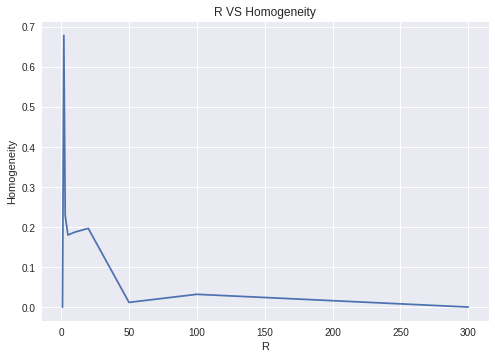

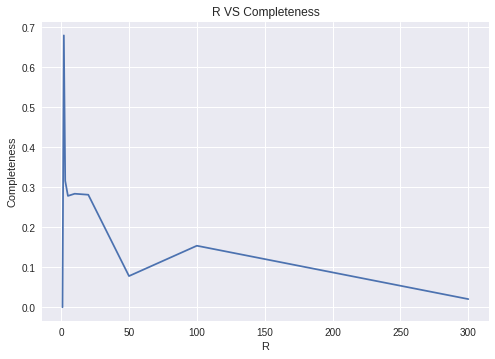

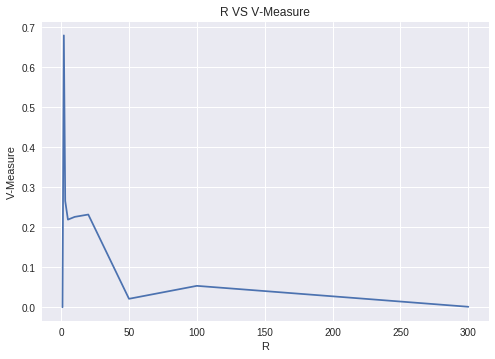

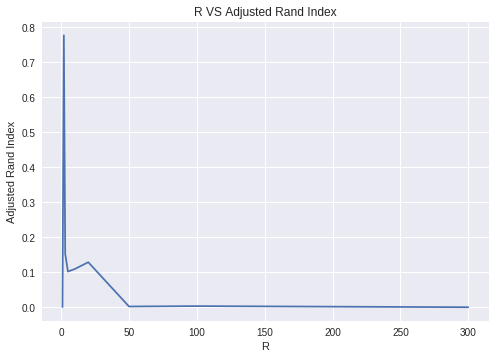

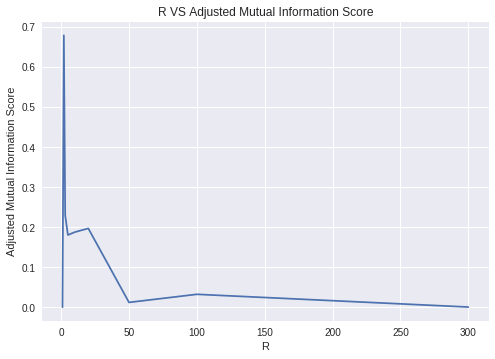

<Figure size 576x396 with 0 Axes>

In [0]:
plot_graph_R_VS_Scores(r, homogeneity_list_NMF, 'Homogeneity')
plot_graph_R_VS_Scores(r, completeness_list_NMF, 'Completeness')
plot_graph_R_VS_Scores(r, v_measure_list_NMF, 'V-Measure')
plot_graph_R_VS_Scores(r, rand_index_list_NMF, 'Adjusted Rand Index')
plot_graph_R_VS_Scores(r, mutual_information_list_NMF, 'Adjusted Mutual Information Score')


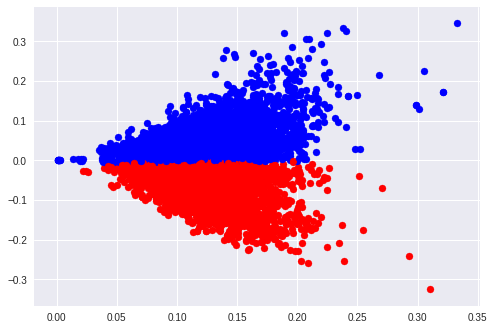

In [0]:
######### JUST SVD WITH TOP 2 FEATURES #########

best_r_SVD = X_reduced_svd[:, 0:2]
kmeans_SVD = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init =30)
kmeans_SVD.fit(best_r_SVD)
kmeans_labels_SVD=kmeans_SVD.labels_
for i in range(X_reduced_svd.shape[0]):
  #print(i)
  if(kmeans_labels_SVD[i] == 0):
    plt.scatter(best_r_SVD[i,0], best_r_SVD[i,1], c='r')
  else:
    plt.scatter(best_r_SVD[i,0], best_r_SVD[i,1], c='b')



(7882, 2)
(2, 27768)


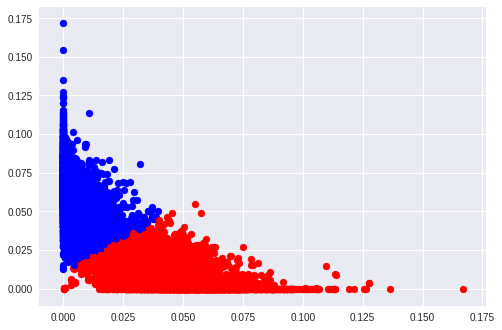

In [0]:
######### JUST NMF WITH TOP 2 FEATURES #########
best_r_NMF = dimension_reduction_NMF(X_tfidf, 2)
kmeans_NMF = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init =30)
kmeans_NMF.fit(best_r_NMF)
kmeans_labels_NMF=kmeans_NMF.labels_
for i in range(best_r_NMF.shape[0]):
  #print(i)
  if(kmeans_labels_NMF[i] == 0):
    plt.scatter(best_r_NMF[i,0], best_r_NMF[i,1], c='r')
  else:
    plt.scatter(best_r_NMF[i,0], best_r_NMF[i,1], c='b')


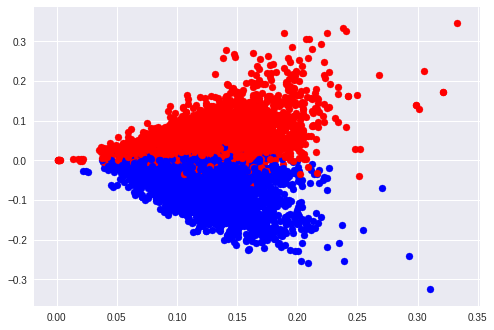

In [0]:
######### JUST SVD WITH TOP 2 FEATURES GROUND TRUTH #########

for i in range(X_reduced_svd.shape[0]):
  #print(i)
  if(labels[i] == 0):
    plt.scatter(best_r_SVD[i,0], best_r_SVD[i,1], c='r')
  else:
    plt.scatter(best_r_SVD[i,0], best_r_SVD[i,1], c='b')


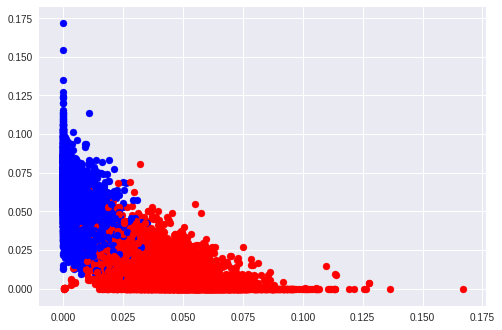

In [0]:
######### JUST NMF WITH TOP 2 FEATURES GROUND TRUTH #########
for i in range(best_r_NMF.shape[0]):
  #print(i)
  if(labels[i] == 0):
    plt.scatter(best_r_NMF[i,0], best_r_NMF[i,1], c='r')
  else:
    plt.scatter(best_r_NMF[i,0], best_r_NMF[i,1], c='b')


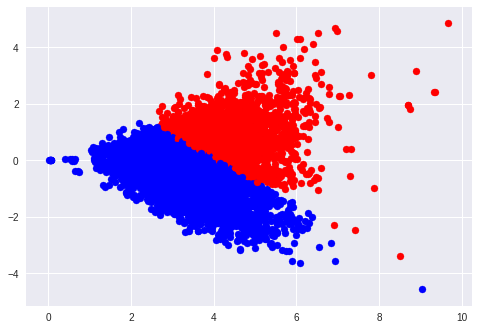

In [0]:
######### SVD WITH NORMALIZATION #########

best_r_SVD_normalized = scale(best_r_SVD, axis=0, with_mean=False, with_std=True)
kmeans_SVD_normalized = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init =30)
kmeans_SVD_normalized.fit(best_r_SVD_normalized)
kmeans_labels_SVD_normalized=kmeans_SVD_normalized.labels_
for i in range(best_r_SVD_normalized.shape[0]):
  #print(i)
  if(kmeans_labels_SVD_normalized[i] == 0):
    plt.scatter(best_r_SVD_normalized[i,0], best_r_SVD_normalized[i,1], c='r')
  else:
    plt.scatter(best_r_SVD_normalized[i,0], best_r_SVD_normalized[i,1], c='b')


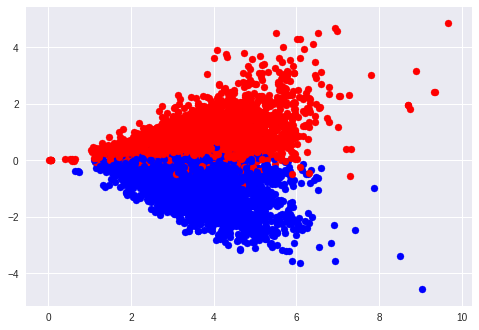

In [0]:
######### SVD WITH NORMALIZATION GROUND TRUTH #########
for i in range(best_r_SVD_normalized.shape[0]):
  #print(i)
  if(labels[i] == 0):
    plt.scatter(best_r_SVD_normalized[i,0], best_r_SVD_normalized[i,1], c='r')
  else:
    plt.scatter(best_r_SVD_normalized[i,0], best_r_SVD_normalized[i,1], c='b')

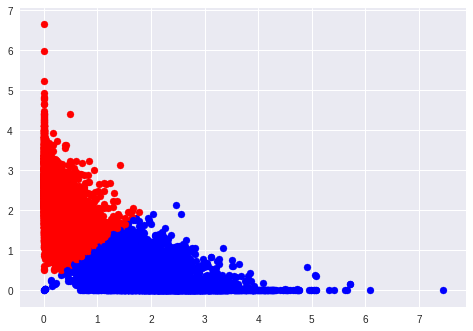

In [0]:
######### NMF WITH NORMALIZATION #########
best_r_NMF_normalized = scale(best_r_NMF, axis=0, with_mean=False, with_std=True)
kmeans_NMF_normalized = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init =30)
kmeans_NMF_normalized.fit(best_r_NMF_normalized)
kmeans_labels_NMF_normalized=kmeans_NMF_normalized.labels_
for i in range(best_r_NMF_normalized.shape[0]):
  #print(i)
  if(kmeans_labels_NMF_normalized[i] == 0):
    plt.scatter(best_r_NMF_normalized[i,0], best_r_NMF_normalized[i,1], c='r')
  else:
    plt.scatter(best_r_NMF_normalized[i,0], best_r_NMF_normalized[i,1], c='b')

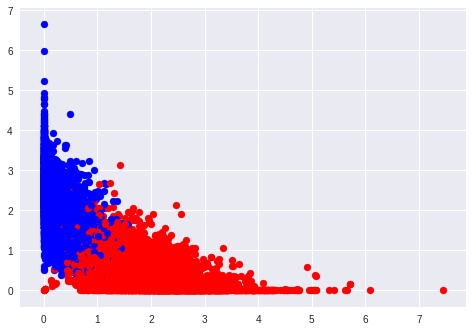

In [0]:
######### NMF WITH NORMALIZATION GROUND TRUTH #########
for i in range(best_r_NMF_normalized.shape[0]):
  #print(i)
  if(labels[i] == 0):
    plt.scatter(best_r_NMF_normalized[i,0], best_r_NMF_normalized[i,1], c='r')
  else:
    plt.scatter(best_r_NMF_normalized[i,0], best_r_NMF_normalized[i,1], c='b')

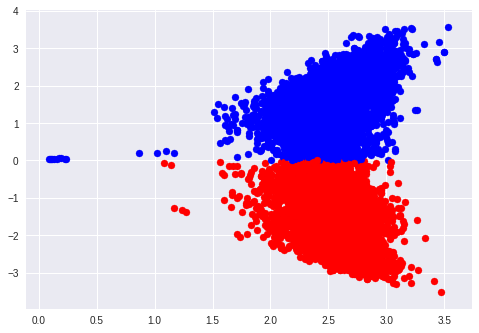

In [0]:
######### SVD WITH LOGARITHMIC TRANSFORMATION #########

sign_best_r_SVD = np.zeros(best_r_SVD.shape)
sign_best_r_SVD[best_r_SVD>0] = 1
sign_best_r_SVD[best_r_SVD<0] = -1

c=0.01
transformed_svd = sign_best_r_SVD*(np.log(np.absolute(best_r_SVD) + c) - np.log(c))

kmeans_transformed_svd = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init =30)
kmeans_transformed_svd.fit(transformed_svd)
kmeans_labels_transformed_svd=kmeans_transformed_svd.labels_
for i in range(transformed_svd.shape[0]):
  #print(i)
  if(kmeans_labels_transformed_svd[i] == 0):
    plt.scatter(transformed_svd[i,0], transformed_svd[i,1], c='r')
  else:
    plt.scatter(transformed_svd[i,0], transformed_svd[i,1], c='b')


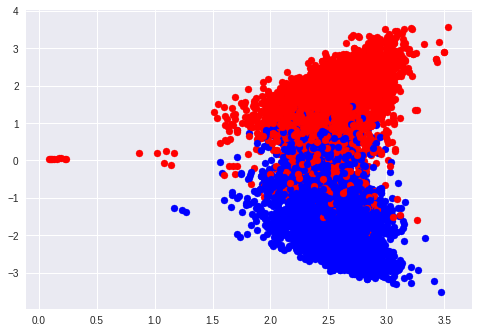

In [0]:
######### SVD WITH TRANSFORMATION GROUND TRUTH #########
for i in range(transformed_svd.shape[0]):
  #print(i)
  if(labels[i] == 0):
    plt.scatter(transformed_svd[i,0], transformed_svd[i,1], c='r')
  else:
    plt.scatter(transformed_svd[i,0], transformed_svd[i,1], c='b')


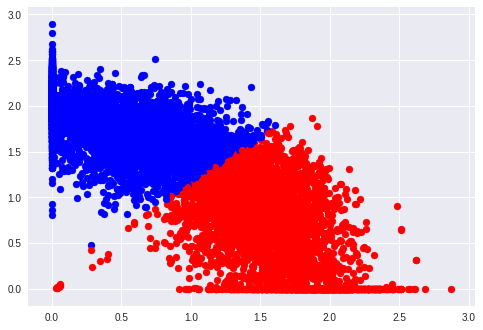

In [0]:
######### NMF WITH TRANSFORMATION #########

sign_best_r_NMF = np.zeros(best_r_NMF.shape)
sign_best_r_NMF[best_r_NMF>0] = 1
sign_best_r_NMF[best_r_NMF<0] = -1

c=0.01
transformed_nmf = sign_best_r_NMF*(np.log(np.absolute(best_r_NMF) + c) - np.log(c))

kmeans_transformed_nmf = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init =30)
kmeans_transformed_nmf.fit(transformed_nmf)
kmeans_labels_transformed_nmf=kmeans_transformed_nmf.labels_
for i in range(transformed_nmf.shape[0]):
  #print(i)
  if(kmeans_labels_transformed_nmf[i] == 0):
    plt.scatter(transformed_nmf[i,0], transformed_nmf[i,1], c='r')
  else:
    plt.scatter(transformed_nmf[i,0], transformed_nmf[i,1], c='b')


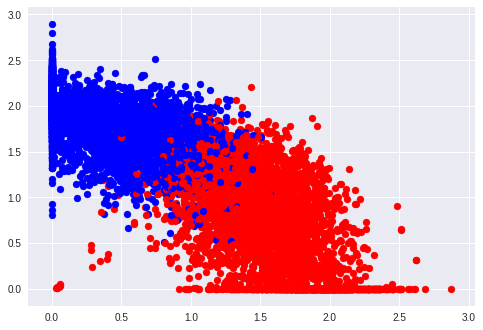

In [0]:
######### NMF WITH TRANSFORMATION GROUND TRUTH #########
for i in range(transformed_nmf.shape[0]):
  #print(i)
  if(labels[i] == 0):
    plt.scatter(transformed_nmf[i,0], transformed_nmf[i,1], c='r')
  else:
    plt.scatter(transformed_nmf[i,0], transformed_nmf[i,1], c='b')

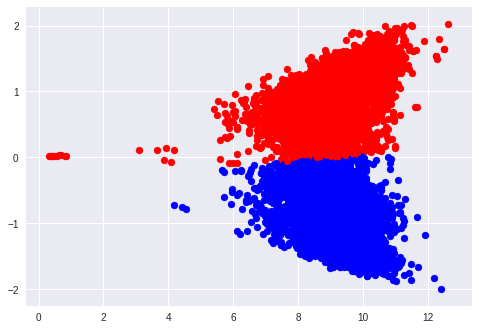

In [0]:
######### SVD WITH TRANSFORMATION THEN NORMALIZATION #########

sign_best_r_SVD = np.zeros(best_r_SVD.shape)
sign_best_r_SVD[best_r_SVD>0] = 1
sign_best_r_SVD[best_r_SVD<0] = -1

c=0.01
transformed_svd = sign_best_r_SVD*(np.log(np.absolute(best_r_SVD) + c) - np.log(c))


transformed_svd_normalized = scale(transformed_svd, axis=0, with_mean=False, with_std=True)
kmeans_transformed_svd_normalized = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init =30)
kmeans_transformed_svd_normalized.fit(transformed_svd_normalized)
kmeans_labels_transformed_svd_normalized=kmeans_transformed_svd_normalized.labels_
for i in range(transformed_svd_normalized.shape[0]):
  #print(i)
  if(kmeans_labels_transformed_svd_normalized[i] == 0):
    plt.scatter(transformed_svd_normalized[i,0], transformed_svd_normalized[i,1], c='r')
  else:
    plt.scatter(transformed_svd_normalized[i,0], transformed_svd_normalized[i,1], c='b')

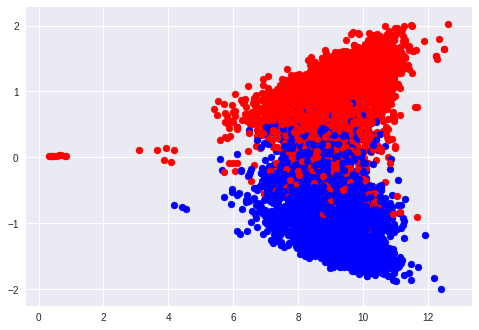

In [0]:
######### SVD WITH TRANSFORMATION THEN NORMALIZATION GROUND TRUTH #########

for i in range(transformed_svd_normalized.shape[0]):
  #print(i)
  if(labels[i] == 0):
    plt.scatter(transformed_svd_normalized[i,0], transformed_svd_normalized[i,1], c='r')
  else:
    plt.scatter(transformed_svd_normalized[i,0], transformed_svd_normalized[i,1], c='b')

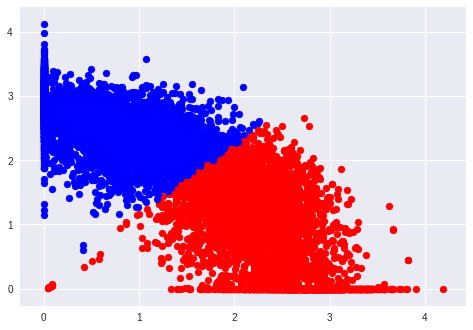

In [0]:
######### NMF WITH TRANSFORMATION THEN NORMALIZATION #########

sign_best_r_NMF = np.zeros(best_r_NMF.shape)
sign_best_r_NMF[best_r_NMF>0] = 1
sign_best_r_NMF[best_r_NMF<0] = -1

c=0.01
transformed_nmf = sign_best_r_NMF*(np.log(np.absolute(best_r_NMF) + c) - np.log(c))

transformed_nmf_normalized = scale(transformed_nmf, axis=0, with_mean=False, with_std=True)
kmeans_transformed_nmf_normalized = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init =30)
kmeans_transformed_nmf_normalized.fit(transformed_nmf_normalized)
kmeans_labels_transformed_nmf_normalized=kmeans_transformed_nmf_normalized.labels_
for i in range(transformed_nmf_normalized.shape[0]):
  #print(i)
  if(kmeans_labels_transformed_nmf_normalized[i] == 0):
    plt.scatter(transformed_nmf_normalized[i,0], transformed_nmf_normalized[i,1], c='r')
  else:
    plt.scatter(transformed_nmf_normalized[i,0], transformed_nmf_normalized[i,1], c='b')


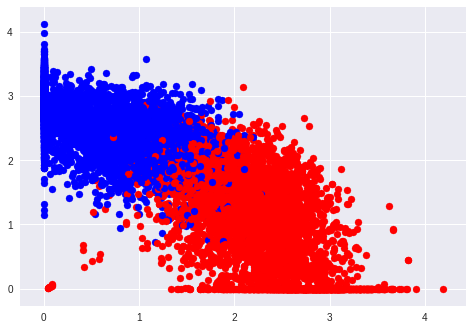

In [0]:
######### NMF WITH TRANSFORMATION THEN NORMALIZATION GROUND TRUTH#########

for i in range(transformed_nmf_normalized.shape[0]):
  #print(i)
  if(labels[i] == 0):
    plt.scatter(transformed_nmf_normalized[i,0], transformed_nmf_normalized[i,1], c='r')
  else:
    plt.scatter(transformed_nmf_normalized[i,0], transformed_nmf_normalized[i,1], c='b')


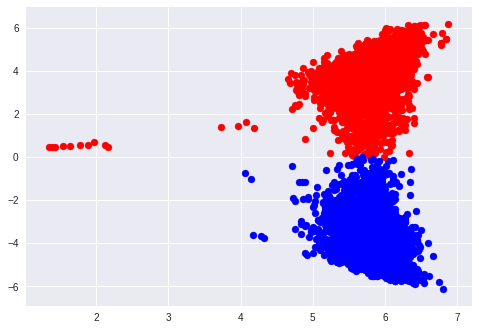

In [0]:
######### SVD WITH NORMALIZATION THEN TRANSFORMATION #########

svd_normalized = scale(best_r_SVD, axis=0, with_mean=False, with_std=True)

sign_best_r_SVD_normalized = np.zeros(svd_normalized.shape)
sign_best_r_SVD_normalized[svd_normalized>0] = 1
sign_best_r_SVD_normalized[svd_normalized<0] = -1

c=0.01
normalized_svd_transformed = sign_best_r_SVD_normalized*(np.log(np.absolute(svd_normalized) + c) - np.log(c))

kmeans_normalized_svd_transformed = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init =30)
kmeans_normalized_svd_transformed.fit(normalized_svd_transformed)
kmeans_labels_normalized_svd_transformed=kmeans_normalized_svd_transformed.labels_
for i in range(normalized_svd_transformed.shape[0]):
  #print(i)
  if(kmeans_labels_normalized_svd_transformed[i] == 0):
    plt.scatter(normalized_svd_transformed[i,0], normalized_svd_transformed[i,1], c='r')
  else:
    plt.scatter(normalized_svd_transformed[i,0], normalized_svd_transformed[i,1], c='b')

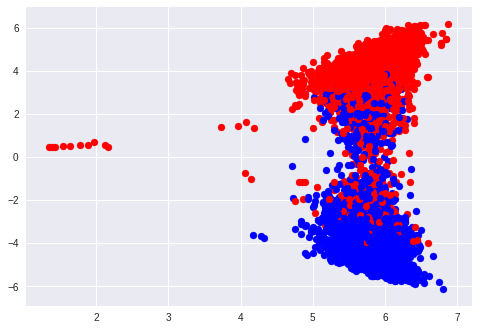

In [0]:
######### SVD WITH NORMALIZATION THEN TRANSFORMATION GROUND TRUTH #########

for i in range(normalized_svd_transformed.shape[0]):
  #print(i)
    if(labels[i] == 0):
        plt.scatter(normalized_svd_transformed[i,0], normalized_svd_transformed[i,1], c='r')
    else:
        plt.scatter(normalized_svd_transformed[i,0], normalized_svd_transformed[i,1], c='b')

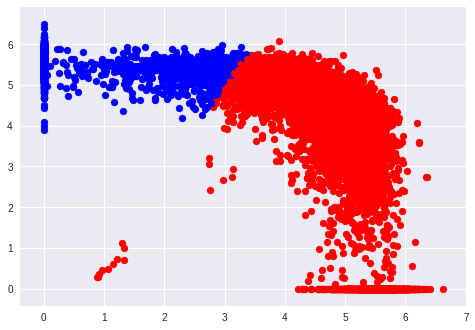

In [0]:
######### NMF WITH NORMALIZATION THEN TRANSFORMATION #########

nmf_normalized = scale(best_r_NMF, axis=0, with_mean=False, with_std=True)

sign_best_r_NMF_normalized = np.zeros(nmf_normalized.shape)
sign_best_r_NMF_normalized[nmf_normalized>0] = 1
sign_best_r_NMF_normalized[nmf_normalized<0] = -1

c=0.01
normalized_nmf_transformed = sign_best_r_NMF_normalized*(np.log(np.absolute(nmf_normalized) + c) - np.log(c))

kmeans_normalized_nmf_transformed = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init =30)
kmeans_normalized_nmf_transformed.fit(normalized_nmf_transformed)
kmeans_labels_normalized_nmf_transformed=kmeans_normalized_nmf_transformed.labels_
for i in range(normalized_nmf_transformed.shape[0]):
    #print(i)
    if(kmeans_labels_normalized_nmf_transformed[i] == 0):
        plt.scatter(normalized_nmf_transformed[i,0], normalized_nmf_transformed[i,1], c='r')
    else:
        plt.scatter(normalized_nmf_transformed[i,0], normalized_nmf_transformed[i,1], c='b')

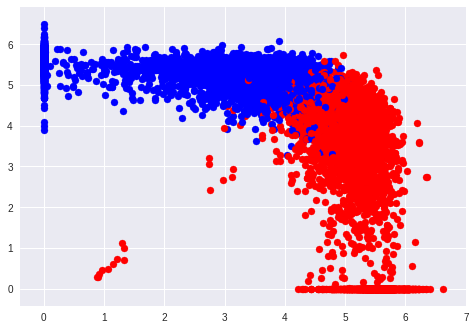

In [0]:
######### NMF WITH NORMALIZATION THEN TRANSFORMATION GROUND TRUTH #########

for i in range(normalized_nmf_transformed.shape[0]):
  #print(i)
  if(labels[i] == 0):
    plt.scatter(normalized_nmf_transformed[i,0], normalized_nmf_transformed[i,1], c='r')
  else:
    plt.scatter(normalized_nmf_transformed[i,0], normalized_nmf_transformed[i,1], c='b')

In [0]:
"""
kmeans_labels_SVD_normalized. 
kmeans_labels_NMF_normalized. 
kmeans_labels_transformed_svd. 
kmeans_labels_transformed_nmf. 
kmeans_labels_transformed_svd_normalized. 
kmeans_labels_transformed_nmf_normalized. 
kmeans_labels_normalized_svd_transformed.
kmeans_labels_normalized_nmf_transformed. 

"""

print(" NORMALIZED SVD RESUTLS \n")
evaluate(labels, kmeans_labels_SVD_normalized)
print("\n\n")

print(" NORMALIZED NMF RESUTLS \n")
evaluate(labels, kmeans_labels_NMF_normalized)
print("\n\n")

print(" TRANSFORMED SVD RESUTLS \n")
evaluate(labels, kmeans_labels_transformed_svd)
print("\n\n")

print(" TRANSFORMED NMF RESUTLS \n")
evaluate(labels, kmeans_labels_transformed_nmf)
print("\n\n")

print(" TRANSFORMED THEN NORMALIZED SVD RESUTLS \n")
evaluate(labels, kmeans_labels_transformed_svd_normalized)
print("\n\n")

print(" TRANSFORMED THEN NORMALIZED NMF RESUTLS \n")
evaluate(labels, kmeans_labels_transformed_nmf_normalized)
print("\n\n")

print(" NORMALIZED THEN TRANSFORMED SVD RESUTLS \n")
evaluate(labels, kmeans_labels_normalized_svd_transformed)
print("\n\n")

print(" NORMALIZED THEN TRANSFORMED NMF RESUTLS \n")
evaluate(labels, kmeans_labels_normalized_nmf_transformed)
print("\n\n")

 NORMALIZED SVD RESUTLS 

homogeneity:   0.23609131805072042
completeness:  0.26450291273288246
v_measure : 0.24949085488903866
adjusted_rand_score:  0.2556510317794412
adjusted_mutual_info_score:  0.2360213789796711



 NORMALIZED NMF RESUTLS 

homogeneity:   0.6828038321574016
completeness:  0.6856459752144646
v_measure : 0.6842219522524521
adjusted_rand_score:  0.7734426774605906
adjusted_mutual_info_score:  0.6827747927166996



 TRANSFORMED SVD RESUTLS 

homogeneity:   0.6103154102550904
completeness:  0.6102847108358388
v_measure : 0.6103000601594027
adjusted_rand_score:  0.7173615346457451
adjusted_mutual_info_score:  0.6102490340872908



 TRANSFORMED NMF RESUTLS 

homogeneity:   0.6757033916294439
completeness:  0.6791388923298461
v_measure : 0.6774167862456966
adjusted_rand_score:  0.7649847921825073
adjusted_mutual_info_score:  0.6756737021308169



 TRANSFORMED THEN NORMALIZED SVD RESUTLS 

homogeneity:   0.6095947774726546
completeness:  0.6095541488812544
v_measure : 0.60

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [0]:
# Q11

# Loading all 20 categories dataet
news_dataset = fetch_20newsgroups(subset='all')

count_vect = CountVectorizer(min_df=3,analyzer='word', stop_words= 'english')
X_counts = count_vect.fit_transform(news_dataset.data)
print(X_counts.shape)
# print(count_vect.get_feature_names())


# Calculating the TF-IDF matrix for train and test data
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
print(X_tfidf.shape)

(18846, 52295)
(18846, 52295)


In [0]:
news_dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [0]:
news_dataset.target

array([10,  3, 17, ...,  3,  1,  7])

In [0]:
from copy import deepcopy
y= news_dataset.target

labels = deepcopy(y)


print(np.unique(labels))
print(labels.shape)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
(18846,)


In [0]:
#perform Kmeans clustering
kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init =30)
kmeans.fit(X_tfidf)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=20, n_init=30, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [0]:
kmeans_labels=kmeans.labels_
contingency_matrix_= contingency_matrix(labels,kmeans_labels)
contingency_matrix_

array([[ 57,  40,   0,   1,   5,  84,   0,   0,  83,   1,   0,   0,   2,
        401,  36,   9,   0,  80,   0,   0],
       [ 82,   0,   1,  16,   1,   1,   2,   0, 241,   0,   0,   4,   1,
          3, 525,   0,   0,   0,   0,  96],
       [ 33,   0,  18,   2,   0,   0,  11,   0, 126,   0,   2,   2,   0,
          0, 206,   0,   0,   0,   0, 585],
       [ 25,   0, 230,   7,   1,   0,   5,   0, 175,   0,   0,   5,   0,
          0, 437,   0,   3,   0,   0,  94],
       [ 25,   0, 103,  10,   0,   0,   1,   0, 372,   0,   0,   3,   0,
          1, 437,   0,   0,   0,   0,  11],
       [ 86,   0,   1,  25,   0,   0,   2,   0, 143,   3,   0,   4,   0,
          1, 569,   0,   0,   0,   0, 154],
       [  5,   0,  70,   3,  27,   0,   7,   0, 477,   0,   0,  12,   5,
          0, 334,   0,  12,   0,   0,  23],
       [ 18,   0,   0,   7, 568,   0,   1,   0, 210,   0,   0,   5,   3,
          0, 164,  12,   0,   0,   0,   2],
       [ 77,   0,   0,  17, 682,   0,   1,   0, 110,   0,   0,  

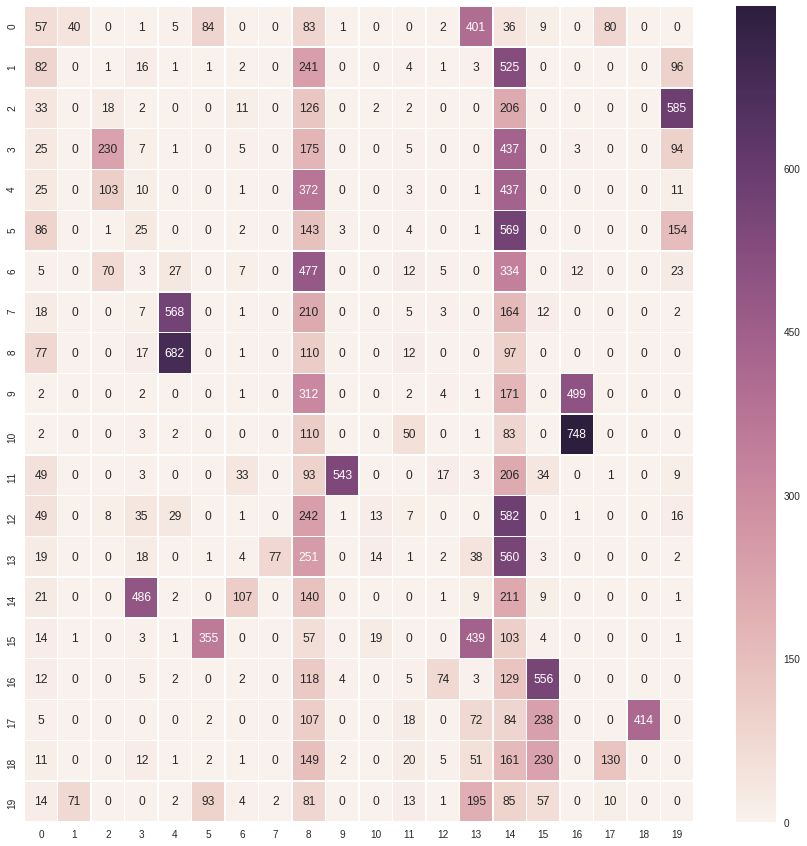

In [42]:
import seaborn as sns
plt.figure(figsize=(15,15))
ax=sns.heatmap(contingency_matrix_, annot=True, fmt="d", linewidth=0.5 )

In [0]:
evaluate(labels, kmeans_labels)

homogeneity:   0.35942082651801804
completeness:  0.45111242050273204
v_measure : 0.4000803165708632
adjusted_rand_score:  0.13663613501490818
adjusted_mutual_info_score:  0.35731878968094594


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [0]:
X_SVD_reduced,_ = dimension_reduction_SVD(X_tfidf)

[0.00119279 0.00365383 0.00282712 0.00263367 0.00223403 0.00215884
 0.00207132 0.00197478 0.00189795 0.00179749 0.00175711 0.00171658
 0.00172002 0.00165116 0.00163035 0.00161158 0.00158161 0.00155523
 0.00153295 0.00152199 0.00145461 0.00139035 0.00138345 0.00136686
 0.00135152 0.00131079 0.00128756 0.00125272 0.00124282 0.00122326
 0.00119745 0.00117301 0.00114184 0.00112365 0.00110255 0.00107766
 0.00106859 0.00105765 0.00105038 0.0010449  0.00102798 0.00101863
 0.00099995 0.00098928 0.00098316 0.00097558 0.00096582 0.00095439
 0.00093994 0.00093407 0.00092888 0.00091521 0.0009073  0.00090622
 0.00090359 0.00089416 0.00089027 0.00088779 0.00087451 0.00086696
 0.00086415 0.00085838 0.00085402 0.00085251 0.00084642 0.00083827
 0.00083384 0.00083298 0.0008167  0.00081415 0.00081301 0.00080932
 0.00080474 0.00079809 0.00079604 0.00078529 0.000784   0.00078274
 0.00077817 0.00077531 0.00077181 0.00076505 0.00076308 0.00076083
 0.00075547 0.00075175 0.00075085 0.00074633 0.00074117 0.0007

In [0]:
def SVD_reduce(n_components = 1):
    return X_SVD_reduced[:, 0:n_components]

In [0]:
#Find the best R's for LSI
r = [1, 2, 3, 5, 10, 20, 50, 100, 300]
homogeneity_list = list()
completeness_list = list()
v_measure_list = list()
rand_index_list = list()
mutual_information_list = list()

for i in r:
    extract_num_comp_from_X = X_SVD_reduced[:, 0:i]
    #print(extract_num_comp_from_X.shape)
    kmeans_2 = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init =30)
    kmeans_2.fit(extract_num_comp_from_X)
    kmeans_labels_2=kmeans_2.labels_
    homogeneity_list.append(homogeneity_score(labels, kmeans_labels_2))
    completeness_list.append(completeness_score(labels, kmeans_labels_2))
    v_measure_list.append(v_measure_score(labels, kmeans_labels_2))
    rand_index_list.append(adjusted_rand_score(labels, kmeans_labels_2))
    mutual_information_list.append(adjusted_mutual_info_score(labels, kmeans_labels_2))



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='a

In [0]:
print(r[np.argmax(homogeneity_list)])
print(r[np.argmax(completeness_list)])
print(r[np.argmax(v_measure_list)])
print(r[np.argmax(rand_index_list)])
print(r[np.argmax(mutual_information_list)])


300
300
300
10
300


In [0]:
best_r_svd = r[np.argmax(v_measure_list)]

In [0]:
best_r_svd

300

In [0]:
# Finding best R using NMF

r = [1, 2, 3, 5, 10, 20, 50, 100, 300]
homogeneity_list_NMF = list()
completeness_list_NMF = list()
v_measure_list_NMF = list()
rand_index_list_NMF = list()
mutual_information_list_NMF = list()

for i in r:
    extract_num_comp_from_X = dimension_reduction_NMF(X_tfidf, i)
    # print(extract_num_comp_from_X.shape)
    kmeans_2 = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init =30)
    kmeans_2.fit(extract_num_comp_from_X)
    kmeans_labels_2=kmeans_2.labels_
    homogeneity_list_NMF.append(homogeneity_score(labels, kmeans_labels_2))
    completeness_list_NMF.append(completeness_score(labels, kmeans_labels_2))
    v_measure_list_NMF.append(v_measure_score(labels, kmeans_labels_2))
    rand_index_list_NMF.append(adjusted_rand_score(labels, kmeans_labels_2))
    mutual_information_list_NMF.append(adjusted_mutual_info_score(labels, kmeans_labels_2))
# print(homogeneity_list_NMF)
# print(completeness_list_NMF)
# print(v_measure_list_NMF)
# print(rand_index_list_NMF)
# print(mutual_information_list_NMF)
best_r_nmf = r[np.argmax(v_measure_list_NMF)]

(18846, 1)
(1, 52295)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


(18846, 2)
(2, 52295)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


(18846, 3)
(3, 52295)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


(18846, 5)
(5, 52295)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


(18846, 10)
(10, 52295)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


(18846, 20)
(20, 52295)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


(18846, 50)
(50, 52295)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


(18846, 100)
(100, 52295)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


(18846, 300)
(300, 52295)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [0]:
best_r_nmf

10

In [0]:
X_SVD_reduced_best = X_SVD_reduced[:, 0:best_r_svd]

In [0]:
######### SVD WITH NORMALIZATION #########

best_r_SVD_normalized = scale(X_SVD_reduced_best, axis=0, with_mean=False, with_std=True)
kmeans_SVD_normalized = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init =30)
kmeans_SVD_normalized.fit(best_r_SVD_normalized)
kmeans_labels_SVD_normalized=kmeans_SVD_normalized.labels_

In [0]:
######### NMF WITH NORMALIZATION #########
X_NMF_reduced_best = dimension_reduction_NMF(X_tfidf, best_r_nmf)
best_r_NMF_normalized = scale(X_NMF_reduced_best, axis=0, with_mean=False, with_std=True)
kmeans_NMF_normalized = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init =30)
kmeans_NMF_normalized.fit(best_r_NMF_normalized)
kmeans_labels_NMF_normalized=kmeans_NMF_normalized.labels_

(18846, 10)
(10, 52295)


In [0]:
######### SVD WITH TRANSFORMATION #########

sign_best_r_SVD = np.zeros(X_SVD_reduced_best.shape)
sign_best_r_SVD[X_SVD_reduced_best>0] = 1
sign_best_r_SVD[X_SVD_reduced_best<0] = -1

c=0.01
transformed_svd = sign_best_r_SVD*(np.log(np.absolute(X_SVD_reduced_best) + c) - np.log(c))

kmeans_transformed_svd = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init =30)
kmeans_transformed_svd.fit(transformed_svd)
kmeans_labels_transformed_svd=kmeans_transformed_svd.labels_

In [0]:
######### NMF WITH TRANSFORMATION #########

sign_best_r_NMF = np.zeros(X_NMF_reduced_best.shape)
sign_best_r_NMF[X_NMF_reduced_best>0] = 1
sign_best_r_NMF[X_NMF_reduced_best<0] = -1

c=0.01
transformed_nmf = sign_best_r_NMF*(np.log(np.absolute(X_NMF_reduced_best) + c) - np.log(c))

kmeans_transformed_nmf = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init =30)
kmeans_transformed_nmf.fit(transformed_nmf)
kmeans_labels_transformed_nmf=kmeans_transformed_nmf.labels_

In [0]:
######### SVD WITH TRANSFORMATION THEN NORMALIZATION #########

sign_best_r_SVD = np.zeros(X_SVD_reduced_best.shape)
sign_best_r_SVD[X_SVD_reduced_best>0] = 1
sign_best_r_SVD[X_SVD_reduced_best<0] = -1

c=0.01
transformed_svd = sign_best_r_SVD*(np.log(np.absolute(X_SVD_reduced_best) + c) - np.log(c))

transformed_svd_normalized = scale(transformed_svd, axis=0, with_mean=False, with_std=True)
kmeans_transformed_svd_normalized = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init =30)
kmeans_transformed_svd_normalized.fit(transformed_svd_normalized)
kmeans_labels_transformed_svd_normalized=kmeans_transformed_svd_normalized.labels_

In [0]:
######### NMF WITH TRANSFORMATION THEN NORMALIZATION #########

sign_best_r_NMF = np.zeros(X_NMF_reduced_best.shape)
sign_best_r_NMF[X_NMF_reduced_best>0] = 1
sign_best_r_NMF[X_NMF_reduced_best<0] = -1

c=0.01
transformed_nmf = sign_best_r_NMF*(np.log(np.absolute(X_NMF_reduced_best) + c) - np.log(c))
transformed_nmf_normalized = scale(transformed_nmf, axis=0, with_mean=False, with_std=True)
kmeans_transformed_nmf_normalized = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init =30)
kmeans_transformed_nmf_normalized.fit(transformed_nmf_normalized)
kmeans_labels_transformed_nmf_normalized=kmeans_transformed_nmf_normalized.labels_

In [0]:
######### SVD WITH NORMALIZATION THEN TRANSFORMATION #########

svd_normalized = scale(X_SVD_reduced_best, axis=0, with_mean=False, with_std=True)

sign_best_r_SVD_normalized = np.zeros(svd_normalized.shape)
sign_best_r_SVD_normalized[svd_normalized>0] = 1
sign_best_r_SVD_normalized[svd_normalized<0] = -1

c=0.01
normalized_svd_transformed = sign_best_r_SVD_normalized*(np.log(np.absolute(svd_normalized) + c) - np.log(c))

kmeans_normalized_svd_transformed = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init =30)
kmeans_normalized_svd_transformed.fit(normalized_svd_transformed)
kmeans_labels_normalized_svd_transformed=kmeans_normalized_svd_transformed.labels_

In [0]:
######### NMF WITH NORMALIZATION THEN TRANSFORMATION #########

nmf_normalized = scale(X_NMF_reduced_best, axis=0, with_mean=False, with_std=True)

sign_best_r_NMF_normalized = np.zeros(nmf_normalized.shape)
sign_best_r_NMF_normalized[nmf_normalized>0] = 1
sign_best_r_NMF_normalized[nmf_normalized<0] = -1

c=0.01
normalized_nmf_transformed = sign_best_r_NMF_normalized*(np.log(np.absolute(nmf_normalized) + c) - np.log(c))

kmeans_normalized_nmf_transformed = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init =30)
kmeans_normalized_nmf_transformed.fit(normalized_nmf_transformed)
kmeans_labels_normalized_nmf_transformed=kmeans_normalized_nmf_transformed.labels_

In [48]:
"""
kmeans_labels_SVD_normalized. 
kmeans_labels_NMF_normalized. 
kmeans_labels_transformed_svd. 
kmeans_labels_transformed_nmf. 
kmeans_labels_transformed_svd_normalized. 
kmeans_labels_transformed_nmf_normalized. 
kmeans_labels_normalized_svd_transformed.
kmeans_labels_normalized_nmf_transformed. 

"""
import pandas as pd
df = pd.DataFrame(columns=['Combination','Homogeneity','Completeness','V-Measure','Adjusted Rand Index','Adjusted Mutual Info Score'])

print(" NORMALIZED SVD RESULTS \n")
h,c,v,r,m = evaluate(labels, kmeans_labels_SVD_normalized)
df.loc[len(df)] = ["NORMALIZED SVD",h,c,v,r,m]
print("\n\n")

print(" NORMALIZED NMF RESULTS \n")
h,c,v,r,m = evaluate(labels, kmeans_labels_NMF_normalized)
df.loc[len(df)] = ["NORMALIZED NMF",h,c,v,r,m]
print("\n\n")

print(" TRANSFORMED SVD RESULTS \n")
h,c,v,r,m = evaluate(labels, kmeans_labels_transformed_svd)
df.loc[len(df)] = ["TRANSFORMED SVD",h,c,v,r,m]
print("\n\n")

print(" TRANSFORMED NMF RESULTS \n")
h,c,v,r,m = evaluate(labels, kmeans_labels_transformed_nmf)
df.loc[len(df)] = ["TRANSFORMED NMF",h,c,v,r,m]
print("\n\n")

print(" TRANSFORMED THEN NORMALIZED SVD RESULTS \n")
h,c,v,r,m = evaluate(labels, kmeans_labels_transformed_svd_normalized)
df.loc[len(df)] = ["TRANSFORMED THEN NORMALIZED SVD",h,c,v,r,m]
print("\n\n")

print(" TRANSFORMED THEN NORMALIZED NMF RESULTS \n")
h,c,v,r,m = evaluate(labels, kmeans_labels_transformed_nmf_normalized)
df.loc[len(df)] = ["TRANSFORMED THEN NORMALIZED NMF",h,c,v,r,m]
print("\n\n")

print(" NORMALIZED THEN TRANSFORMED SVD RESULTS \n")
h,c,v,r,m = evaluate(labels, kmeans_labels_normalized_svd_transformed)
df.loc[len(df)] = [" NORMALIZED THEN TRANSFORMED SVD",h,c,v,r,m]
print("\n\n")

print(" NORMALIZED THEN TRANSFORMED NMF RESULTS \n")
h,c,v,r,m = evaluate(labels, kmeans_labels_normalized_nmf_transformed)
df.loc[len(df)] = ["NORMALIZED THEN TRANSFORMED NMF",h,c,v,r,m]
print("\n\n")

 NORMALIZED SVD RESULTS 

homogeneity:   0.07139973211011585
completeness:  0.16332356715299787
v_measure : 0.09936175044063984
adjusted_rand_score:  0.015260454073723046
adjusted_mutual_info_score:  0.06821782429951932



 NORMALIZED NMF RESULTS 

homogeneity:   0.3146788289816036
completeness:  0.3531589335386425
v_measure : 0.3328102898253315
adjusted_rand_score:  0.11785818404140373


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


adjusted_mutual_info_score:  0.3124520130093744



 TRANSFORMED SVD RESULTS 

homogeneity:   0.37895531169180274
completeness:  0.455564937370126
v_measure : 0.41374371210528016
adjusted_rand_score:  0.1693266060507439
adjusted_mutual_info_score:  0.3769344637927778



 TRANSFORMED NMF RESULTS 

homogeneity:   0.37535474791063367
completeness:  0.38679890302875286
v_measure : 0.3809909053365245
adjusted_rand_score:  0.20424240785316033
adjusted_mutual_info_score:  0.37333458163496974



 TRANSFORMED THEN NORMALIZED SVD RESULTS 

homogeneity:   0.3911716351707267
completeness:  0.4751370069430752
v_measure : 0.4290852264443468
adjusted_rand_score:  0.16286551499094293
adjusted_mutual_info_score:  0.3891951744095512



 TRANSFORMED THEN NORMALIZED NMF RESULTS 

homogeneity:   0.3807462154909037
completeness:  0.3920930520704722
v_measure : 0.38633633657662003
adjusted_rand_score:  0.1999725734859481
adjusted_mutual_info_score:  0.37874337315438594



 NORMALIZED THEN TRANSFORMED SVD RESU

In [51]:
df

,Combination,Homogeneity,Completeness,V-Measure,Adjusted Rand Index,Adjusted Mutual Info Score
0,NORMALIZED SVD,0.071400,0.163324,0.099362,0.015260,0.068218
1,NORMALIZED NMF,0.314679,0.353159,0.332810,0.117858,0.312452
2,TRANSFORMED SVD,0.378955,0.455565,0.413744,0.169327,0.376934
3,TRANSFORMED NMF,0.375355,0.386799,0.380991,0.204242,0.373335
4,TRANSFORMED THEN NORMALIZED SVD,0.391172,0.475137,0.429085,0.162866,0.389195
5,TRANSFORMED THEN NORMALIZED NMF,0.380746,0.392093,0.386336,0.199973,0.378743
6,NORMALIZED THEN TRANSFORMED SVD,0.362552,0.418372,0.388467,0.150187,0.360487
7,NORMALIZED THEN TRANSFORMED NMF,0.309147,0.314108,0.311608,0.150821,0.306917
